In [32]:

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs


## annual mean

In [33]:
mean_era5_loaded = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/mean_era5.nc').tp
mean_uk_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded//mean_uk_aligned.nc').pr
mean_germany_aligned = xr.open_dataset('/scratch/nf33/sc5932//Data/regridded/mean_germany_aligned.nc').pr
mean_imerg = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/mean_imerg_aligned.nc').precipitation
mean_access = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/mean_access_amip_aligned.nc').pr
data_all = [mean_era5_loaded , mean_imerg , mean_access , mean_uk_aligned , mean_germany_aligned]



### index 1


In [ ]:
%run /scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions/SC_function.ipynb

lat_bounds = [slice(15,5) , slice(-5,-15) , slice(5,-5)]
lon_bounds = [slice(160, 180), slice(-180, -120)]

annual_mean_index = doubel_itcz_index(lat_bounds , lon_bounds , data_all)

all_index , area_mean_Pn, area_mean_Ps, area_mean_Pe = annual_mean_index

### index 2

In [ ]:
%run /scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions/SC_function.ipynb

lat_bounds = [slice(20,0) , slice(0,-20) , slice(20,-20)]
lon_bounds =  slice(-150, -90)

annual_mean_index = doubel_itcz_index_2025_GRL(lat_bounds , lon_bounds , data_all)

all_index , area_mean_Pn, area_mean_Ps, area_mean_Pe = annual_mean_index

In [35]:
all_index

[np.float64(1.260836159771761),
 np.float32(1.521634),
 np.float64(0.8697840491295772),
 np.float32(1.1658889),
 np.float32(1.2247041)]

## seasonal

In [2]:
mean_era5_loaded = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_era5.nc').tp
mean_uk_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_uk_aligned.nc').pr
mean_germany_aligned = xr.open_dataset('/scratch/nf33/sc5932//Data/regridded/seasonal_germany_aligned.nc').pr
mean_imerg = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_imerg_aligned.nc').precipitation
mean_access = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_access_amip_aligned.nc').pr.rename({'lat': 'latitude', 'lon': 'longitude'})


In [5]:
lat_bounds = [slice(20,0) , slice(0,-20) , slice(20,-20)]
lon_bounds =  slice(-150, -90)

%run /scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions/SC_function.ipynb


In [6]:

all_season_index = []
# all_season_index_p =[]
all_season_Pn = []
all_season_Ps = []
all_season_Pe = []
for mon in range(4):
    mon_name = ['DJF', 'JJA', 'MAM', 'SON']
    data_all = [mean_era5_loaded.sel(season = mon_name[mon]), 
                mean_imerg.sel(season = mon_name[mon]) ,
                mean_access.sel(season = mon_name[mon]) , 
                mean_uk_aligned.sel(season = mon_name[mon]) , 
                mean_germany_aligned.sel(season = mon_name[mon])
                ]
    annual_mean_index = doubel_itcz_index_2025_GRL(lat_bounds , lon_bounds , data_all)

    all_index ,  area_mean_Pn, area_mean_Ps, area_mean_Pe = doubel_itcz_index_2025_GRL(lat_bounds , lon_bounds , data_all)
    all_season_index.append(np.array(all_index ))
    all_season_Pn.append(np.array(area_mean_Pn ))
    all_season_Ps.append(np.array(area_mean_Ps ))
    all_season_Pe.append(np.array(area_mean_Pe ))
    

In [ ]:

#'DJF', 'JJA', 'MAM', 'SON'

In [36]:
a = np.array(all_index)
b = np.array(all_season_index) # 0 era5 , 1 imerg, 2 access, 3 um, 4 icon 

a, b

(array([1.26083616, 1.52163398, 0.86978405, 1.16588891, 1.22470415]),
 array([[1.21357645, 1.46753168, 0.68567813, 1.08009565, 1.08773398],
        [1.41490109, 1.64691257, 1.2280089 , 1.44736528, 1.33573759],
        [0.9166625 , 1.2605921 , 0.326039  , 0.57720965, 1.0426091 ],
        [1.43971805, 1.67540467, 1.12257246, 1.52371597, 1.40316617]]))

In [37]:
c = np.concatenate((a.reshape(1, -1), b), axis=0)

c

array([[1.26083616, 1.52163398, 0.86978405, 1.16588891, 1.22470415],
       [1.21357645, 1.46753168, 0.68567813, 1.08009565, 1.08773398],
       [1.41490109, 1.64691257, 1.2280089 , 1.44736528, 1.33573759],
       [0.9166625 , 1.2605921 , 0.326039  , 0.57720965, 1.0426091 ],
       [1.43971805, 1.67540467, 1.12257246, 1.52371597, 1.40316617]])

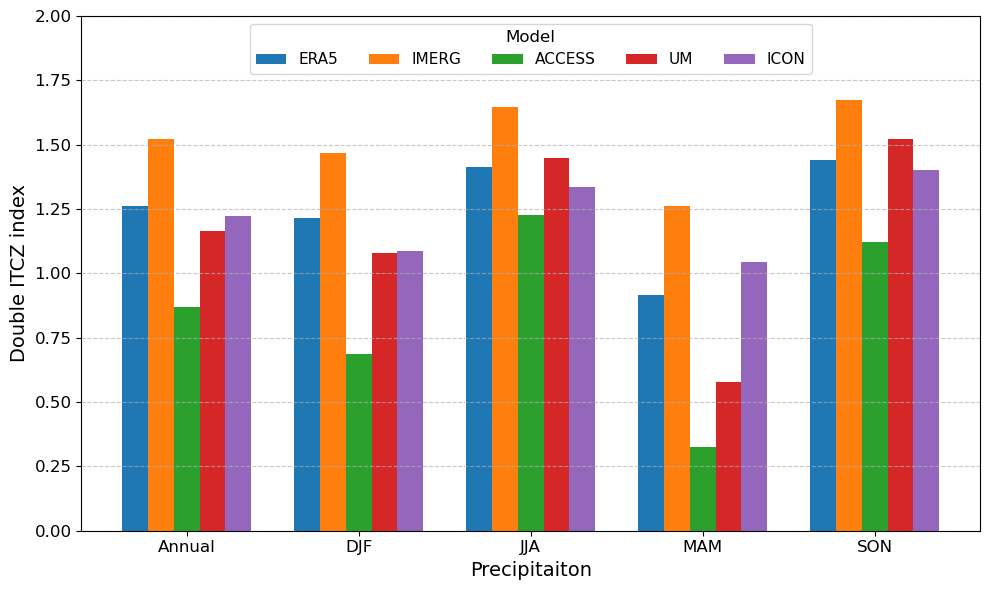

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming c is a (5, 5) array: seasons x models
model_names = ['ERA5', 'IMERG', 'ACCESS', 'UM', 'ICON']
season_names = ['Annual', 'DJF','JJA','MAM', 'SON']

x = np.arange(len(season_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Plot each model's data
for i in range(len(model_names)):
    plt.bar(x + i * bar_width, c[:, i], width=bar_width, label=model_names[i])

# Formatting
plt.xticks(x + bar_width * 2, season_names, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Precipitaiton', fontsize=14)
plt.ylabel('Double ITCZ index', fontsize=14)
# plt.title('Seasonal Mean by Model', fontsize=16)
plt.ylim(0, 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model', fontsize=11, title_fontsize=12, ncol=5, loc='upper center')
plt.tight_layout()

name_save = "/scratch/nf33/sc5932/Fig/Doubel ITCZ Index.png"
plt.savefig(name_save , dpi=300, bbox_inches='tight')

In [152]:
season_n = 2 # 0 'DJF', 1 'JJA', 2 'MAM', 3 'SON'
parameter_n =4   # 0 all_index , 1 all_index_p, 2 area_mean_Pn, 3 area_mean_Ps, 4 area_mean_Pe
model_n = 0 # 0 era5 , 1 imerg, 2 access, 3 um, 4 icon 

all_season_index[season_n][parameter_n][model_n]

array(4.64177286)

In [138]:
np.array(all_season_index [0])  #['DJF', 'JJA', 'MAM', 'SON']

array([[3.81749433, 3.78581643, 4.19535117, 4.30300331, 3.13293767],
       [0.29286565, 0.35397804, 0.32062085, 0.32007164, 0.31205326],
       [5.6032999 , 4.27315998, 6.42154824, 5.5129261 , 3.9599781 ],
       [5.63167474, 5.38075733, 5.09874271, 6.318326  , 4.82181501],
       [1.79999299, 1.04114223, 1.5647943 , 1.61262298, 1.25795913]])

In [139]:
np.array(all_season_index[1] )

array([[4.50856107, 3.68215084, 2.39279042, 5.14156628, 2.86541486],
       [0.31024211, 0.33564407, 0.17400437, 0.34916553, 0.2475418 ],
       [8.35662509, 5.97330809, 5.36437475, 7.33569145, 6.0507946 ],
       [4.33734614, 3.79506111, 5.39836815, 5.90888453, 3.57646775],
       [1.83842455, 1.202034  , 2.98858103, 1.48072171, 1.9482162 ]])

In [140]:
pn = np.array(all_season_index[2] )
pn

array([[0.54860837, 0.47309971, 1.37299926, 2.80411768, 0.28488255],
       [0.03651903, 0.03804274, 0.09350135, 0.17692316, 0.02450408],
       [6.16092929, 5.14939356, 4.0319888 , 5.80166817, 4.08626413],
       [4.21983316, 3.45667648, 6.67285847, 6.6339798 , 3.85427308],
       [4.64177286, 3.82993507, 3.97942437, 3.4137063 , 3.68538618]])

In [142]:
ps = np.array(all_season_index[3] )
ps

array([[5.32205106, 4.32383442, 4.91768252, 5.39382172, 4.35604572],
       [0.39074854, 0.41319019, 0.3716669 , 0.42001942, 0.39188594],
       [8.71461379, 6.36596632, 7.21558557, 7.89932156, 6.55072641],
       [3.91351572, 3.49293232, 4.88381907, 4.2577858 , 3.7637012 ],
       [0.99201369, 0.6056146 , 1.13201979, 0.68473172, 0.80116802]])